In [2]:
import sys
sys.path.append('/Users/josephine/Documents/Engineering /Part IIB/Score alignment project/Score-follower/GP_models')
import helper
from numpy.linalg import inv
import numpy as np
from matplotlib import pyplot as plt
import scipy.io.wavfile as wav
from numpy.linalg import cholesky, det
from scipy.linalg import solve_triangular


44100


/var/folders/n4/k97yk30s1wn32d7y6729kph80000gn/T/ipykernel_9037/868768356.py:4: WavFileWarning: Chunk (non-data) not understood, skipping it.
  sample_rate, data = wav.read(wav_file)


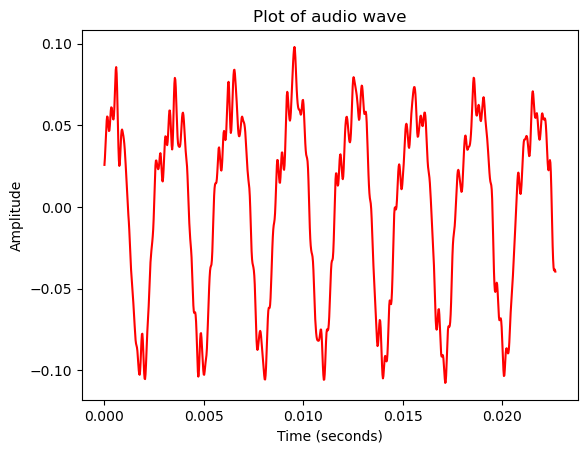

In [28]:
# Set up wav file as data
# Training data
wav_file = '/Users/josephine/Documents/Engineering /Part IIB/Score alignment project/Score-follower/wav_files/piano_E4_330.wav'
sample_rate, data = wav.read(wav_file)
data = data[8000:9000]
print(sample_rate)
# data = data[4600:6600]

audio_duration = len(data)/sample_rate
time_samples = np.linspace(0, audio_duration, len(data))
helper.plot_audio(time_samples, data)

In [27]:
print(np.exp(-helper.relative_nlml(time_samples, data,f=[330], T=0.465, v=2.37,amplitude=[1])))

0it [00:00, ?it/s]

1it [00:00,  7.83it/s]

0.9287729778873594


  0%|          | 0/1 [00:00<?, ?it/s]

100%|██████████| 1/1 [00:00<00:00,  1.53it/s]


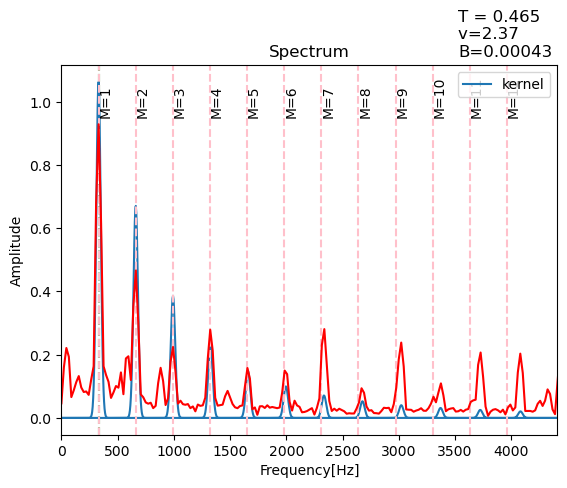

In [36]:


sigma_f = 20
helper.return_kernel_spectrum(f=[330],v=2.37, sigma_f = sigma_f, amplitude=62)
helper.plot_fft(data, power_spectrum=True)

In [18]:
T=0.5
v=3.75
M=9
sigma_f = 1/50000
true = np.exp(-helper.relative_nlml(time_samples, data, f=[330], sigma_f=sigma_f, M=M,T=T, v=v, normalised=True, amplitude=None ))
print(true)
print(np.exp(-helper.relative_nlml(time_samples, data, f=[330/2], sigma_f=sigma_f, M=M,T=T, v=v, normalised=True, amplitude=None )))
print(np.exp(-helper.relative_nlml(time_samples, data, f=[335], sigma_f=sigma_f, M=M,T=T, v=v, normalised=True, amplitude=None )))

many_notes = np.exp(-helper.relative_nlml(time_samples, data, f=[330,311], sigma_f=sigma_f, M=M,T=T, v=v, normalised=True, amplitude=None ))
print(many_notes)
print("\n true - many notes = ", true - many_notes)

0it [00:00, ?it/s]

1it [00:00, 12.86it/s]
1it [00:00, 13.19it/s]
1it [00:00, 14.92it/s]

0.8876790497074111
0.7768347026774067



2it [00:00, 14.03it/s]


0.5562968808811545
0.8905854184373033

 true - many notes =  -0.0029063687298922503


  0%|          | 0/1 [00:00<?, ?it/s]

100%|██████████| 1/1 [00:00<00:00,  1.84it/s]


(array([0., 0., 0., ..., 0., 0., 0.]),
 array([  0.  ,   4.41,   8.82, ..., -13.23,  -8.82,  -4.41]))

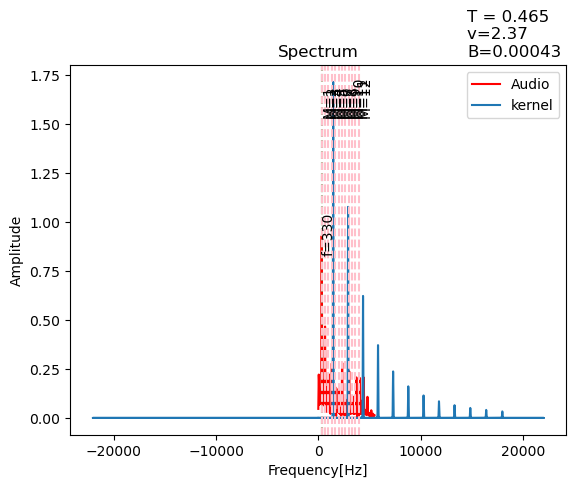

In [54]:

helper.plot_fft(data, power_spectrum=True)
helper.return_kernel_spectrum(f=[330])